In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Change directory to where your .ipynb file is located in Google Drive
os.chdir('/content/drive/My Drive/')

# Check current working directory
print("Current working directory:", os.getcwd())

Mounted at /content/drive
Current working directory: /content/drive/My Drive


In [7]:
import pandas as pd

# Step 1: Load the CSV into Python as a dataframe
file_path = 'glassdoor_reviews.csv'
df = pd.read_csv(file_path)

# Step 2: Take only the recommend, headline, pros, and cons columns to create a new dataframe
columns_to_keep = ['firm','recommend', 'headline', 'pros', 'cons']
filtered_df = df[columns_to_keep]

# Step 3: Combine headline, pros, and cons into a single column called review_content
filtered_df['review_content'] = (
    'headline: ' + filtered_df['headline'].fillna('') +
    ' pros: ' + filtered_df['pros'].fillna('') +
    ' cons: ' + filtered_df['cons'].fillna('')
)

# Keep only the recommend and review_content columns
final_df = filtered_df[['firm','recommend', 'review_content']]

# Display the first few rows of the adjusted dataframe
print(final_df.head())

# Save the adjusted dataframe to a new CSV file
final_df.to_csv('adjusted_glassdoor_reviews.csv', index=False)
print("Saved the adjusted dataframe to 'adjusted_glassdoor_reviews.csv'")


<ipython-input-7-7180b8868e9f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['review_content'] = (


                    firm recommend  \
0  AFH-Wealth-Management         x   
1  AFH-Wealth-Management         x   
2  AFH-Wealth-Management         x   
3  AFH-Wealth-Management         x   
4  AFH-Wealth-Management         x   

                                      review_content  
0  headline: Young colleagues, poor micro managem...  
1  headline: Excellent staff, poor salary pros: F...  
2  headline: Low salary, bad micromanagement pros...  
3  headline: Over promised under delivered pros: ...  
4  headline: client reporting admin pros: Easy to...  
Saved the adjusted dataframe to 'adjusted_glassdoor_reviews.csv'


In [8]:
final_df

,firm,recommend,review_content
0,AFH-Wealth-Management,x,"headline: Young colleagues, poor micro managem..."
1,AFH-Wealth-Management,x,"headline: Excellent staff, poor salary pros: F..."
2,AFH-Wealth-Management,x,"headline: Low salary, bad micromanagement pros..."
3,AFH-Wealth-Management,x,headline: Over promised under delivered pros: ...
4,AFH-Wealth-Management,x,headline: client reporting admin pros: Easy to...
...,...,...,...
838561,the-LEGO-Group,v,headline: Just an awesome company to work for!...
838562,the-LEGO-Group,o,headline: working at lego pros: staff discount...
838563,the-LEGO-Group,v,headline: not interested in growing their peop...
838564,the-LEGO-Group,o,headline: Great Place to Work pros: Good wages...


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset (adjust file_path to your dataset)
#file_path = 'adjusted_glassdoor_reviews.csv'
#df = pd.read_csv(file_path)

# Step 2: Filter for entries from "the-LEGO-Group"
lego_df = final_df[final_df['firm'] == 'the-LEGO-Group']

# Step 3: Print the number of entries
print(f"Number of entries for 'the-LEGO-Group': {len(lego_df)}")

Number of entries for 'the-LEGO-Group': 824


Model Accuracy: 0.70

Classification Report:
                 precision    recall  f1-score   support

  Negative (x)       0.00      0.00      0.00        35
No Opinion (o)       0.71      0.98      0.82       172
  Positive (v)       0.62      0.12      0.20        41

      accuracy                           0.70       248
     macro avg       0.44      0.37      0.34       248
  weighted avg       0.59      0.70      0.60       248



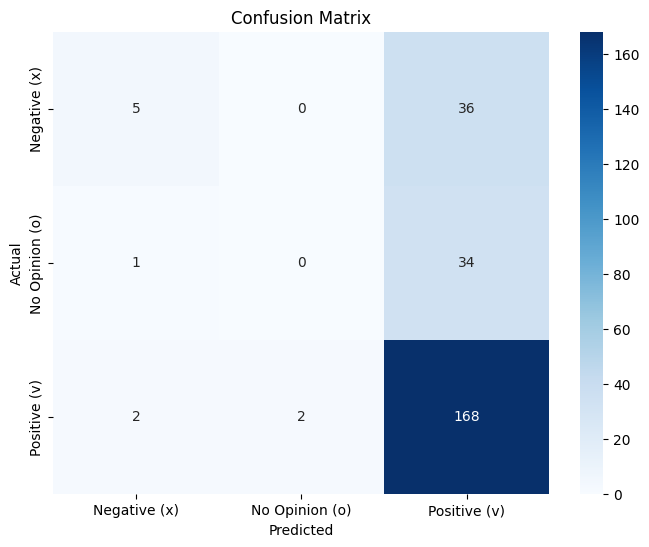

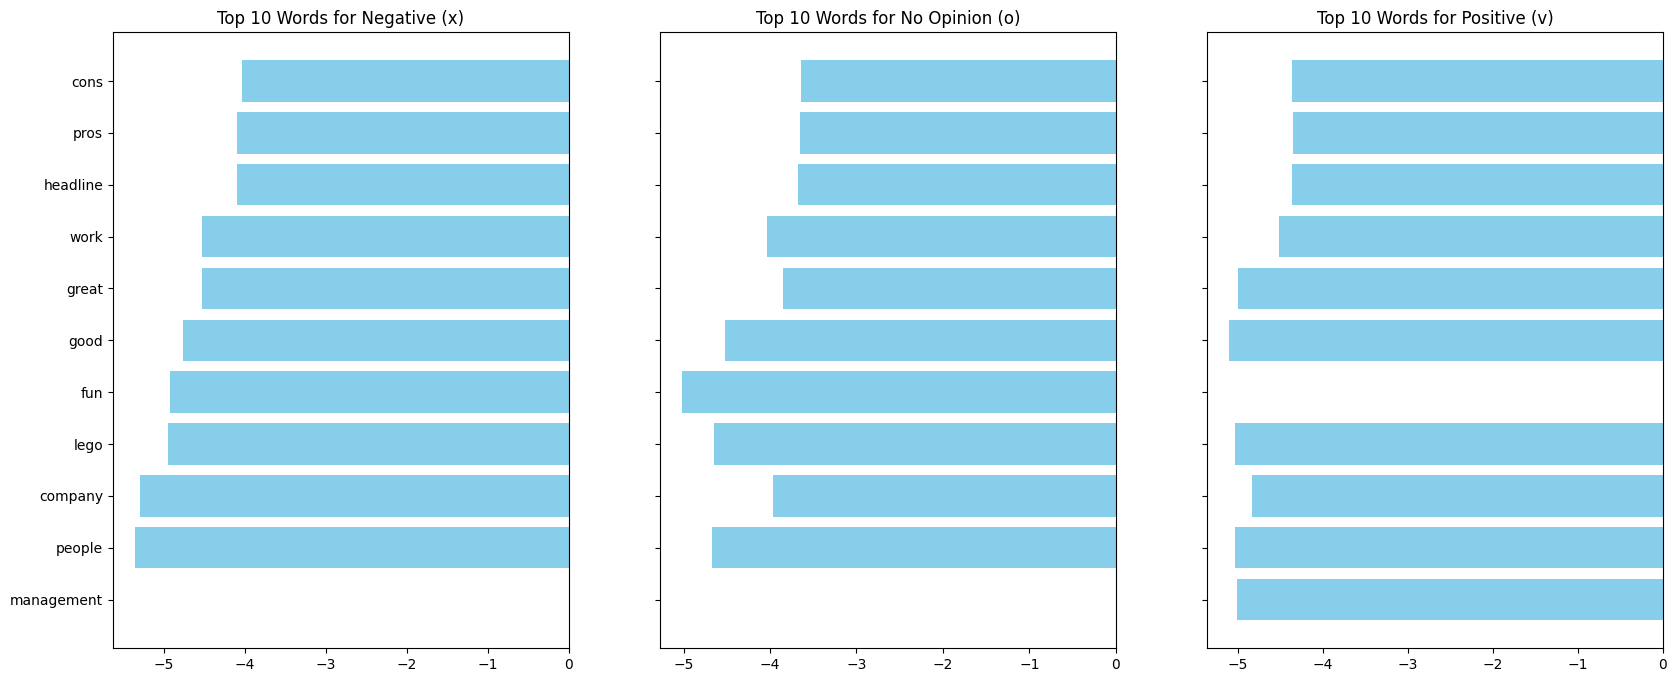

Saved results to 'naive_bayes_report.txt'


In [10]:
# Step 4: Prepare the data for Naive Bayes
# Using 'review_content' as features and 'recommend' as target
X = lego_df['review_content']
y = lego_df['recommend']

# Convert text into numeric features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 5: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Step 6: Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Step 9: Visualize the results
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['x', 'o', 'v'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'], yticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization
feature_names = vectorizer.get_feature_names_out()
feature_probs = model.feature_log_prob_
fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

categories = ['Negative (x)', 'No Opinion (o)', 'Positive (v)']
for i, cat in enumerate(categories):
    top10 = feature_probs[i].argsort()[-10:][::-1]
    ax[i].barh([feature_names[j] for j in top10], feature_probs[i, top10], color='skyblue')
    ax[i].set_title(f'Top 10 Words for {cat}')
    ax[i].invert_yaxis()

plt.show()

# Step 10: Save the evaluation report
with open("naive_bayes_report.txt", "w") as f:
    f.write(f"Model Accuracy: {accuracy:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

print("Saved results to 'naive_bayes_report.txt'")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-11-e214957aacd1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_df['vader_compound'] = lego_df['review_content'].apply(lambda x: vader.polarity_scores(x)['compound'])
<ipython-input-11-e214957aacd1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_df['vader_sentiment'] = lego_df['vader_compound'].apply(get_sentiment)


Classification Report (VADER vs Recommend):
                precision    recall  f1-score   support

  Negative (x)       0.27      0.02      0.04       137
No Opinion (o)       0.69      0.97      0.81       542
  Positive (v)       0.64      0.23      0.34       145

      accuracy                           0.68       824
     macro avg       0.54      0.41      0.40       824
  weighted avg       0.61      0.68      0.60       824



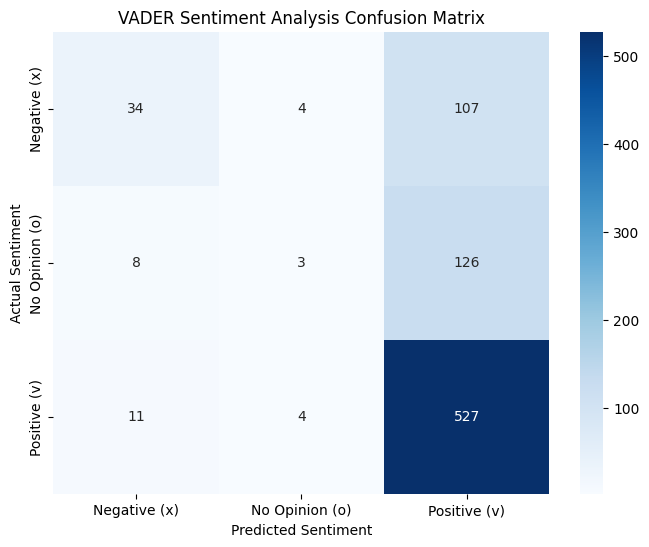

VADER Overall Accuracy: 68.45%
Saved VADER results to 'vader_sentiment_report.txt'


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Step 1: Filter LEGO reviews
#lego_df = df[df['firm'] == 'the-LEGO-Group']

# Step 2: Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Step 3: Analyze sentiment of the 'review_content' column
def get_sentiment(score):
    """Convert VADER compound score to sentiment label."""
    if score >= 0.05:
        return 'v'  # Positive
    elif score <= -0.05:
        return 'x'  # Negative
    else:
        return 'o'  # Neutral (No Opinion)

lego_df['vader_compound'] = lego_df['review_content'].apply(lambda x: vader.polarity_scores(x)['compound'])
lego_df['vader_sentiment'] = lego_df['vader_compound'].apply(get_sentiment)

# Step 4: Evaluate VADER's performance
print("Classification Report (VADER vs Recommend):")
vader_report = classification_report(lego_df['recommend'], lego_df['vader_sentiment'], target_names=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
print(vader_report)

# Step 5: Visualize confusion matrix
conf_matrix = confusion_matrix(lego_df['recommend'], lego_df['vader_sentiment'], labels=['x', 'o', 'v'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'], yticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
plt.title('VADER Sentiment Analysis Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Step 6: Summarize the results
accuracy = (conf_matrix.diagonal().sum() / conf_matrix.sum()) * 100
print(f"VADER Overall Accuracy: {accuracy:.2f}%")

# Save the classification report to a file
with open("vader_sentiment_report.txt", "w") as f:
    f.write("Classification Report (VADER vs Recommend):\n")
    f.write(vader_report)
    f.write(f"\nVADER Overall Accuracy: {accuracy:.2f}%\n")

print("Saved VADER results to 'vader_sentiment_report.txt'")


Number of entries for McDonald's: 49450


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-12-19e7aa6a74c4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_df['vader_compound'] = mcdonalds_df['review_content'].apply(lambda x: vader.polarity_scores(x)['compound'])
<ipython-input-12-19e7aa6a74c4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_df['vader_sentiment'] = mcdonalds_df['vader_compound'].apply(get_sentiment)


Classification Report (VADER vs Recommend):
                precision    recall  f1-score   support

  Negative (x)       0.42      0.04      0.08     18462
No Opinion (o)       0.41      0.86      0.55     17278
  Positive (v)       0.50      0.39      0.44     13710

      accuracy                           0.43     49450
     macro avg       0.44      0.43      0.36     49450
  weighted avg       0.44      0.43      0.34     49450



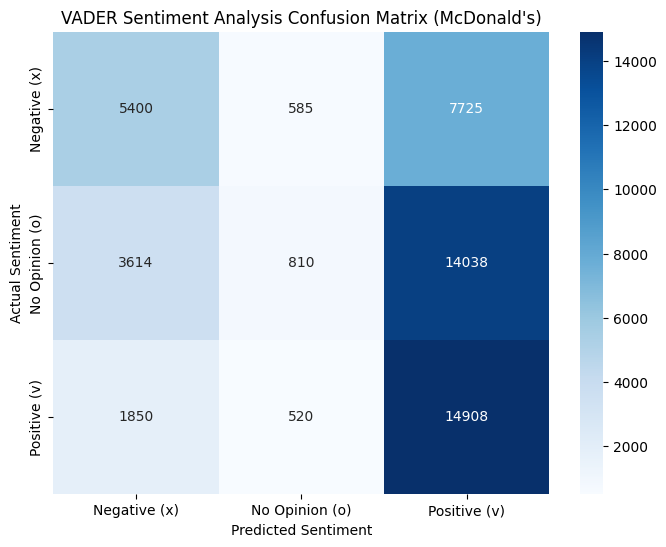

VADER Overall Accuracy for McDonald's: 42.71%
Saved VADER results to 'vader_sentiment_report_mcdonalds.txt'


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Step 2: Filter for entries from McDonald's
mcdonalds_df = final_df[final_df['firm'] == 'McDonald-s']

# Step 3: Check and print the number of entries
print(f"Number of entries for McDonald's: {len(mcdonalds_df)}")

# Step 4: Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Step 5: Analyze sentiment of the 'review_content' column
def get_sentiment(score):
    """Convert VADER compound score to sentiment label."""
    if score >= 0.05:
        return 'v'  # Positive
    elif score <= -0.05:
        return 'x'  # Negative
    else:
        return 'o'  # Neutral (No Opinion)

mcdonalds_df['vader_compound'] = mcdonalds_df['review_content'].apply(lambda x: vader.polarity_scores(x)['compound'])
mcdonalds_df['vader_sentiment'] = mcdonalds_df['vader_compound'].apply(get_sentiment)

# Step 6: Evaluate VADER's performance
print("Classification Report (VADER vs Recommend):")
vader_report = classification_report(mcdonalds_df['recommend'], mcdonalds_df['vader_sentiment'], target_names=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
print(vader_report)

# Step 7: Visualize confusion matrix
conf_matrix = confusion_matrix(mcdonalds_df['recommend'], mcdonalds_df['vader_sentiment'], labels=['x', 'o', 'v'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'], yticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
plt.title("VADER Sentiment Analysis Confusion Matrix (McDonald's)")
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Step 8: Summarize the results
accuracy = (conf_matrix.diagonal().sum() / conf_matrix.sum()) * 100
print(f"VADER Overall Accuracy for McDonald's: {accuracy:.2f}%")

# Save the classification report to a file
with open("vader_sentiment_report_mcdonalds.txt", "w") as f:
    f.write("Classification Report (VADER vs Recommend):\n")
    f.write(vader_report)
    f.write(f"\nVADER Overall Accuracy: {accuracy:.2f}%\n")

print("Saved VADER results to 'vader_sentiment_report_mcdonalds.txt'")


Naive Bayes Model Accuracy for McDonald's: 0.51

Classification Report:
                 precision    recall  f1-score   support

  Negative (x)       0.47      0.66      0.55      5536
No Opinion (o)       0.53      0.42      0.47      5219
  Positive (v)       0.57      0.41      0.48      4080

      accuracy                           0.51     14835
     macro avg       0.53      0.50      0.50     14835
  weighted avg       0.52      0.51      0.50     14835



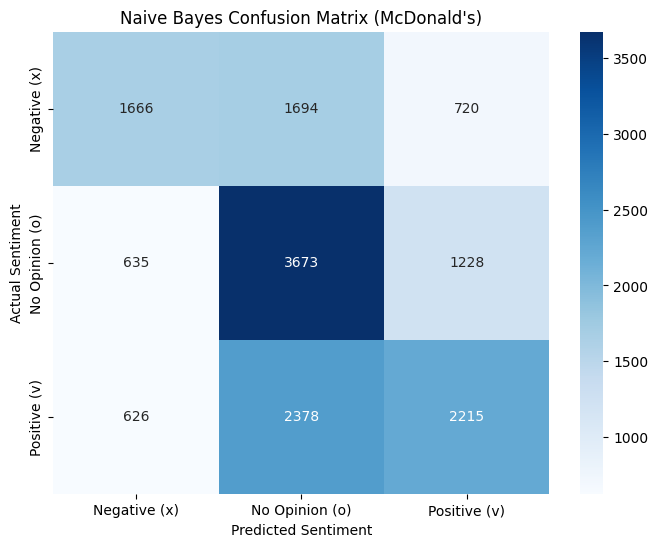

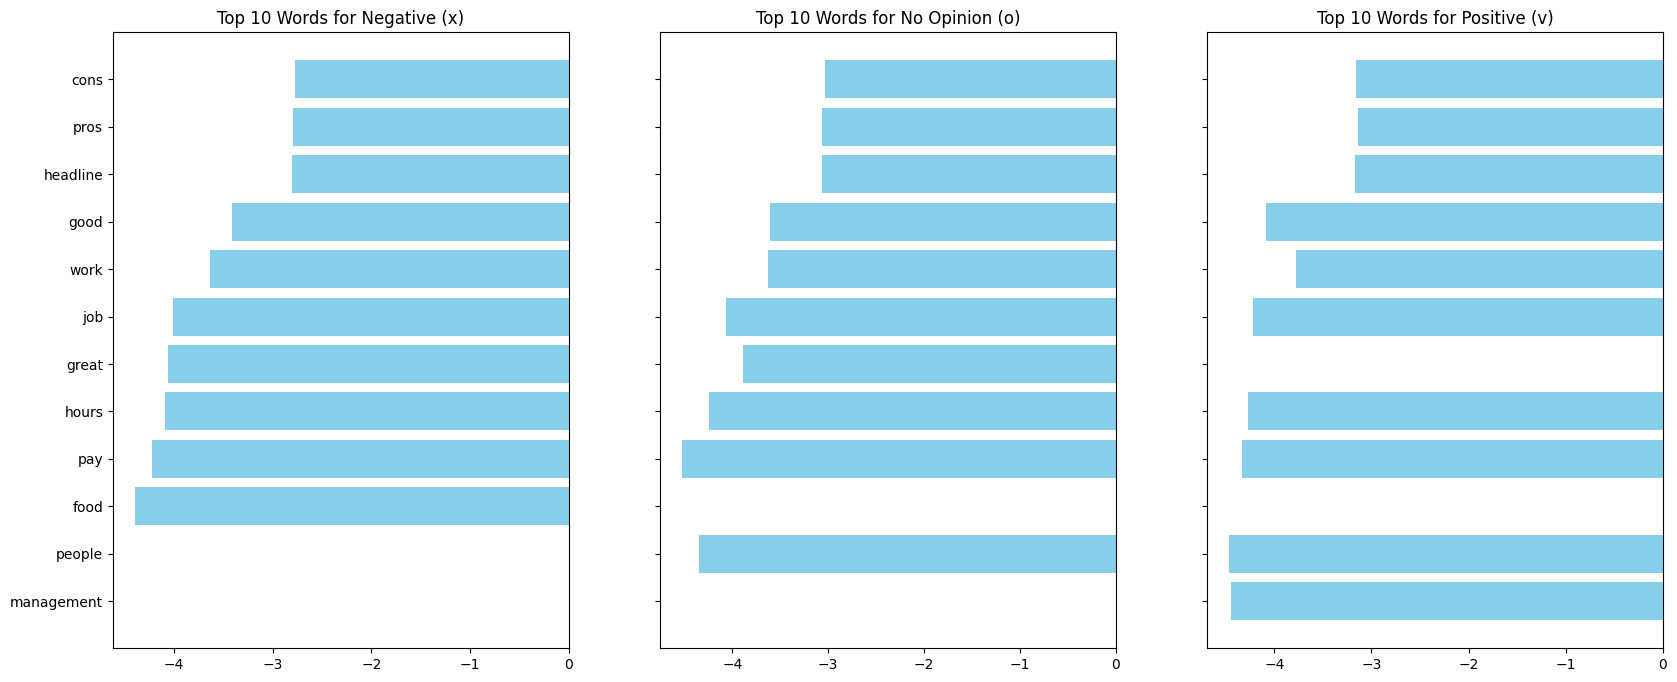

Saved Naive Bayes results to 'naive_bayes_report_mcdonalds.txt'


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the McDonald's dataset (ensure 'review_content' exists)
if 'review_content' not in df.columns:
    df['review_content'] = (
        'headline: ' + df['headline'].fillna('') +
        ' pros: ' + df['pros'].fillna('') +
        ' cons: ' + df['cons'].fillna('')
    )
mcdonalds_df = df[df['firm'] == 'McDonald-s']

# Step 2: Prepare the data for Naive Bayes
# Features: 'review_content', Target: 'recommend'
X = mcdonalds_df['review_content']
y = mcdonalds_df['recommend']

# Convert text into numeric features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Split into training (70%) and testing (30%) data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Step 4: Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Naive Bayes Model Accuracy for McDonald's: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['x', 'o', 'v'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'], yticklabels=['Negative (x)', 'No Opinion (o)', 'Positive (v)'])
plt.title("Naive Bayes Confusion Matrix (McDonald's)")
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Step 7: Feature Importance Visualization
feature_names = vectorizer.get_feature_names_out()
feature_probs = model.feature_log_prob_
fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

categories = ['Negative (x)', 'No Opinion (o)', 'Positive (v)']
for i, cat in enumerate(categories):
    top10 = feature_probs[i].argsort()[-10:][::-1]
    ax[i].barh([feature_names[j] for j in top10], feature_probs[i, top10], color='skyblue')
    ax[i].set_title(f'Top 10 Words for {cat}')
    ax[i].invert_yaxis()

plt.show()

# Step 8: Save the results to a file
with open("naive_bayes_report_mcdonalds.txt", "w") as f:
    f.write(f"Naive Bayes Model Accuracy for McDonald's: {accuracy:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

print("Saved Naive Bayes results to 'naive_bayes_report_mcdonalds.txt'")


In [14]:
def map_sentiment_label(recommend):
    if recommend == 'v':  # Positive
        return 'positive'
    elif recommend == 'x':  # Negative
        return 'negative'
    elif recommend == 'o':  # Neutral / No opinion
        return 'neutral'
    else:
        return None  # Handle unexpected values


In [15]:
import re

def clean_text(text):
    # Remove special characters, excessive whitespace, and ensure readability
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s,.!?]', '', text)  # Remove non-alphanumeric characters
    return text.strip()


In [16]:
mcdonalds_df['sentiment_label'] = mcdonalds_df['recommend'].apply(map_sentiment_label)
mcdonalds_df['cleaned_review'] = mcdonalds_df['review_content'].apply(clean_text)

# Filter rows with valid sentiment labels
fine_tuning_df = mcdonalds_df[mcdonalds_df['sentiment_label'].notnull()]

# Create prompt and completion columns
fine_tuning_df = fine_tuning_df[['cleaned_review', 'sentiment_label']]
fine_tuning_df.rename(columns={'cleaned_review': 'prompt', 'sentiment_label': 'completion'}, inplace=True)


<ipython-input-16-5e25089f94c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_df['sentiment_label'] = mcdonalds_df['recommend'].apply(map_sentiment_label)
<ipython-input-16-5e25089f94c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_df['cleaned_review'] = mcdonalds_df['review_content'].apply(clean_text)


In [17]:
import json

# Save to JSONL file
fine_tuning_records = fine_tuning_df.to_dict(orient='records')
with open('mcdonalds_fine_tuning_data.jsonl', 'w') as f:
    for record in fine_tuning_records:
        f.write(json.dumps(record) + '\n')


In [18]:
fine_tuning_df['completion'].value_counts()


,count
completion,
neutral,18462
positive,17278
negative,13710


In [19]:
sampled_df = fine_tuning_df.sample(1000, random_state=42)  # Adjust sample size as needed


In [20]:
fine_tuning_df

,prompt,completion
503785,headline Store Manager for McDonalds pros The ...,neutral
503786,headline Its better than starving pros If you ...,negative
503787,headline Crew member at McDonalds pros It was ...,positive
503788,headline Only looks good on your resume pros C...,negative
503789,headline McDonalds is a good place to work wit...,positive
...,...,...
553230,headline Overall decent job pros easy money an...,neutral
553231,headline Great stepping stone pros Low qualifi...,positive
553232,headline Manager for the people department pro...,neutral
553233,headline Ok pros Free food and flexible schedu...,negative


In [21]:
sampled_df

,prompt,completion
541187,headline good place to work pros They give you...,positive
527922,"headline Very good pros Great work place, wond...",positive
548049,headline Not too bad starting job pros hours a...,positive
542684,"headline Good Company pros Great Owner, Great ...",positive
517034,"headline Easy, fast paced pros good job for a ...",neutral
...,...,...
506939,headline Crew Member McDonalds pros Flexible t...,positive
508390,headline Hustled for little wage never sell yo...,negative
525967,headline CEL pros Its a great place to work du...,positive
542049,headline Good company pros Flexible and good b...,neutral


In [22]:
# Step 1: Ensure the sampled_df is created first (e.g., 1000 samples)
sampled_df = fine_tuning_df.sample(1000, random_state=42)

# Step 2: Create test_sampled_df with entries not in sampled_df
# Use an anti-join approach to exclude rows in sampled_df
test_sampled_df = fine_tuning_df.loc[~fine_tuning_df.index.isin(sampled_df.index)]

# Step 3: Sample 430 rows from the remaining dataset
test_sampled_df = test_sampled_df.sample(430, random_state=42)

# Step 4: Verify no overlap between sampled_df and test_sampled_df
overlap = sampled_df.index.intersection(test_sampled_df.index)
print(f"Overlap between sampled_df and test_sampled_df: {len(overlap)}")  # Should be 0

# Step 5: Save test_sampled_df for testing purposes
test_sampled_df.to_csv("test_sampled_df.csv", index=False)
print("Saved test_sampled_df with 430 responses to 'test_sampled_df.csv'")


Overlap between sampled_df and test_sampled_df: 0
Saved test_sampled_df with 430 responses to 'test_sampled_df.csv'


In [23]:
import json

# Function to create the messages structure for each review
def create_messages(row):
    system_content = (
        "You are a human resources psychologist interested in determining employee levels of satisfaction at McDonald's. "
        "Employees submit reviews of their jobs at McDonald's, listing a 'heading' for their review, the 'pros' of working at McDonald's, "
        "and the 'cons' of working at McDonald's. Your job is to categorize their sentiment as a one-word response: either 'positive,' "
        "'negative,' or 'neutral.'"
    )
    user_content = f"Heading: {row['headline']}\nPros: {row['pros']}\nCons: {row['cons']}"
    assistant_content = row['completion']
    return {
        "messages": [
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content},
            {"role": "assistant", "content": assistant_content},
        ]
    }

# Map 'recommend' column to sentiment labels
def map_sentiment_label(recommend):
    if recommend == 'v':
        return "positive"
    elif recommend == 'x':
        return "negative"
    elif recommend == 'o':
        return "neutral"
    else:
        return None

# Apply mapping and create messages
mcdonalds_df['completion'] = mcdonalds_df['recommend'].apply(map_sentiment_label)
filtered_df = mcdonalds_df[mcdonalds_df['completion'].notnull()]

# Generate the JSONL data
jsonl_data = filtered_df.apply(create_messages, axis=1).tolist()

# Save to JSONL file
output_file = "mcdonalds_fine_tuning_data_with_system_prompt.jsonl"
with open(output_file, 'w') as f:
    for entry in jsonl_data:
        f.write(json.dumps(entry) + '\n')

print(f"Saved fine-tuning data with system prompt to {output_file}")


<ipython-input-23-326e1eec2460>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_df['completion'] = mcdonalds_df['recommend'].apply(map_sentiment_label)


Saved fine-tuning data with system prompt to mcdonalds_fine_tuning_data_with_system_prompt.jsonl


In [25]:
# Step 1: Combine indices of sampled_df and the previous test_sampled_df
excluded_indices = set(sampled_df.index).union(test_sampled_df.index)

# Step 2: Filter the dataframe to exclude these indices
remaining_df = df.loc[~df.index.isin(excluded_indices)]

# Step 3: Randomly sample 430 entries from the remaining dataframe
second_test_sampled_df = remaining_df.sample(430, random_state=42)

# Step 4: Verify no overlap between sampled_df, test_sampled_df, and second_test_sampled_df
overlap_with_sampled = set(sampled_df.index).intersection(set(second_test_sampled_df.index))
overlap_with_first_test = set(test_sampled_df.index).intersection(set(second_test_sampled_df.index))

assert len(overlap_with_sampled) == 0, "Overlap detected with sampled_df!"
assert len(overlap_with_first_test) == 0, "Overlap detected with test_sampled_df!"

# Step 5: Save the new test dataset
second_test_sampled_df.to_json("second_test_sampled_df.jsonl", orient="records", lines=True)
print("Saved 'second_test_sampled_df.jsonl' with 430 entries for testing.")




Saved 'second_test_sampled_df.jsonl' with 430 entries for testing.


In [30]:
second_test_sampled_df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,review_content
0,McDonald-s,2016-02-16,,Current Employee,None,2,3.0,3.0,NaN,3.0,3.0,3.0,x,r,r,cook,pretty easy and time fullfilling,a job that didnt suit me well,headline: cook pros: pretty easy and time full...
1,J-P-Morgan,2020-01-31,IT Security Support Manager,"Former Employee, more than 5 years","New York, NY",3,4.0,3.0,NaN,3.0,4.0,2.0,v,o,r,Not the best and not the worst,"Many smart, good people.\r\nInteresting work.",Senior Management needs to realize the value o...,headline: Not the best and not the worst pros:...
2,Goldman-Sachs,2019-10-16,Associate,"Former Employee, more than 3 years","New York, NY",3,2.0,4.0,NaN,2.0,2.0,2.0,x,r,x,All round experience,Culturally strong and a good set of people to ...,Meritocracy does not come first,headline: All round experience pros: Culturall...
3,IBM,2020-05-27,Chief Operating Officer,"Former Employee, more than 10 years","Bogotá, Bogota, Bogota",4,3.0,4.0,NaN,4.0,3.0,4.0,v,v,r,Great Company to work with,"Cloud Business: 1) strong strategy 2) public, ...","Big, Complex, Not Agile Processes",headline: Great Company to work with pros: Clo...
4,Microsoft,2010-04-18,Senior OE Systems LEAD,Current Employee,"Redmond, WA",5,4.0,NaN,NaN,5.0,5.0,4.0,v,x,o,"Microsoft IT, Operations Engineering","Outstanding benefits, fantastic people, very d...",Reactive in the marketplace. Sometimes I don'...,"headline: Microsoft IT, Operations Engineering..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Barclays,2016-03-14,Senior UI/User Experience Designer,"Current Employee, more than 5 years","Dallas, TX",5,5.0,5.0,NaN,5.0,5.0,5.0,v,o,v,"Great company, great design team",The Dallas Design team is a very fun and diver...,The only down side is I sometimes go through o...,"headline: Great company, great design team pro..."
426,PwC,2013-01-17,Associate,"Former Employee, more than 3 years",None,4,2.0,3.0,NaN,4.0,4.0,3.0,o,o,o,Prospective CAs... You need them and they need...,You need experience at a public firm in order ...,Huge workload and lots of (unpaid) overtime. ...,headline: Prospective CAs... You need them and...
427,McDonald-s,2021-02-12,Sheetz Crew Member,Former Employee,"Greensburg, PA",4,5.0,3.0,5.0,3.0,3.0,4.0,x,r,r,Working at McDonalds,Flexible hours\r\nDecent pay for the area,Dirty\r\nRude Customers\r\nHigh expectations f...,headline: Working at McDonalds pros: Flexible ...
428,McKinsey-and-Company,2019-01-03,Associate,"Former Employee, less than 1 year",Bangalore,4,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Associate,good place and cheerful environment,work pressure and crucial deadline,headline: Associate pros: good place and cheer...


In [38]:
import json

# Load the second test dataset
second_test_sampled_df = pd.read_json("second_test_sampled_df.jsonl", lines=True)

# Function to create API-ready messages
def create_api_prompt(row):
    system_content = (
        "You are a human resources psychologist interested in determining employee levels of satisfaction at McDonald's. "
        "Employees submit reviews of their jobs at McDonald's, listing a 'heading' for their review, the 'pros' of working at McDonald's, "
        "and the 'cons' of working at McDonald's. They likely listed entries for both pros and cons, as they were instructed, "
        "but just because there is a mix of pros and cons does not always mean they are neutral about it. However, "
        "sometimes they are indeed neutral about it. Reviews include both pros and cons but may still be overall positive or negative. "
        "Neutral reviews should only be chosen if the tone is truly balanced or ambivalent. Your job is to categorize their sentiment "
        "as a one-word response: either 'positive,' 'negative,' or 'neutral.'"
    )
    user_content = f"Heading: {row['headline']}\nPros: {row['pros']}\nCons: {row['cons']}"
    return {"messages": [
        {"role": "system", "content": system_content},
        {"role": "user", "content": user_content}
    ]}

# Create the API input format
api_test_data = second_test_sampled_df.apply(create_api_prompt, axis=1).tolist()

# Save the adjusted JSONL file for API input
api_test_file = "api_test_data.jsonl"
with open(api_test_file, 'w') as f:
    for entry in api_test_data:
        f.write(json.dumps(entry) + '\n')

print(f"Saved API test data to {api_test_file}")


Saved API test data to api_test_data.jsonl


In [31]:
#checking the formatting
#api_test_data

In [37]:
import json

# Map 'recommend' values to sentiment labels
def map_sentiment_label(recommend):
    if recommend == 'v':
        return "positive"
    elif recommend == 'x':
        return "negative"
    elif recommend == 'o':
        return "neutral"
    else:
        return None  # Handle unexpected values

# Add 'completion' column to the dataframe by mapping 'recommend'
second_test_sampled_df['completion'] = second_test_sampled_df['recommend'].apply(map_sentiment_label)

# Function to create JSONL structure with sentiments
def create_api_prompt_with_sentiment(row):
    system_content = (
        "You are a human resources psychologist interested in determining employee levels of satisfaction at McDonald's. "
        "Employees submit reviews of their jobs at McDonald's, listing a 'heading' for their review, the 'pros' of working at McDonald's, "
        "and the 'cons' of working at McDonald's. They likely listed entries for both pros and cons, as they were instructed, "
        "but just because there is a mix of pros and cons does not always mean they are neutral about it. However, "
        "sometimes they are indeed neutral about it. Reviews include both pros and cons but may still be overall positive or negative. "
        "Neutral reviews should only be chosen if the tone is truly balanced or ambivalent. Your job is to categorize their sentiment "
        "as a one-word response: either 'positive,' 'negative,' or 'neutral.'"
    )
    user_content = f"Heading: {row['headline']}\nPros: {row['pros']}\nCons: {row['cons']}"
    sentiment = row['completion']
    return {
        "messages": [
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content}
        ],
        "sentiment": sentiment
    }

# Apply the function to create JSONL entries
api_test_data_with_sentiments = second_test_sampled_df.apply(create_api_prompt_with_sentiment, axis=1).tolist()

# Save to JSONL
output_file_with_sentiments = "api_test_data_with_sentiments.jsonl"
with open(output_file_with_sentiments, 'w') as f:
    for entry in api_test_data_with_sentiments:
        f.write(json.dumps(entry) + '\n')

print(f"Saved API test data with sentiments to {output_file_with_sentiments}")


Saved API test data with sentiments to api_test_data_with_sentiments.jsonl


In [34]:
second_test_sampled_df

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,review_content
0,McDonald-s,2016-02-16,,Current Employee,None,2,3.0,3.0,NaN,3.0,3.0,3.0,x,r,r,cook,pretty easy and time fullfilling,a job that didnt suit me well,headline: cook pros: pretty easy and time full...
1,J-P-Morgan,2020-01-31,IT Security Support Manager,"Former Employee, more than 5 years","New York, NY",3,4.0,3.0,NaN,3.0,4.0,2.0,v,o,r,Not the best and not the worst,"Many smart, good people.\r\nInteresting work.",Senior Management needs to realize the value o...,headline: Not the best and not the worst pros:...
2,Goldman-Sachs,2019-10-16,Associate,"Former Employee, more than 3 years","New York, NY",3,2.0,4.0,NaN,2.0,2.0,2.0,x,r,x,All round experience,Culturally strong and a good set of people to ...,Meritocracy does not come first,headline: All round experience pros: Culturall...
3,IBM,2020-05-27,Chief Operating Officer,"Former Employee, more than 10 years","Bogotá, Bogota, Bogota",4,3.0,4.0,NaN,4.0,3.0,4.0,v,v,r,Great Company to work with,"Cloud Business: 1) strong strategy 2) public, ...","Big, Complex, Not Agile Processes",headline: Great Company to work with pros: Clo...
4,Microsoft,2010-04-18,Senior OE Systems LEAD,Current Employee,"Redmond, WA",5,4.0,NaN,NaN,5.0,5.0,4.0,v,x,o,"Microsoft IT, Operations Engineering","Outstanding benefits, fantastic people, very d...",Reactive in the marketplace. Sometimes I don'...,"headline: Microsoft IT, Operations Engineering..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Barclays,2016-03-14,Senior UI/User Experience Designer,"Current Employee, more than 5 years","Dallas, TX",5,5.0,5.0,NaN,5.0,5.0,5.0,v,o,v,"Great company, great design team",The Dallas Design team is a very fun and diver...,The only down side is I sometimes go through o...,"headline: Great company, great design team pro..."
426,PwC,2013-01-17,Associate,"Former Employee, more than 3 years",None,4,2.0,3.0,NaN,4.0,4.0,3.0,o,o,o,Prospective CAs... You need them and they need...,You need experience at a public firm in order ...,Huge workload and lots of (unpaid) overtime. ...,headline: Prospective CAs... You need them and...
427,McDonald-s,2021-02-12,Sheetz Crew Member,Former Employee,"Greensburg, PA",4,5.0,3.0,5.0,3.0,3.0,4.0,x,r,r,Working at McDonalds,Flexible hours\r\nDecent pay for the area,Dirty\r\nRude Customers\r\nHigh expectations f...,headline: Working at McDonalds pros: Flexible ...
428,McKinsey-and-Company,2019-01-03,Associate,"Former Employee, less than 1 year",Bangalore,4,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Associate,good place and cheerful environment,work pressure and crucial deadline,headline: Associate pros: good place and cheer...


In [39]:
import pandas as pd

# Load the original McDonald's dataset
#original_data_path = "mcdonalds_data.csv"
original_data = mcdonalds_df

# Ensure the dataset has no missing values in required columns
required_columns = ['headline', 'pros', 'cons', 'recommend']  # Adjust if necessary
original_data = original_data.dropna(subset=required_columns)

# Map 'recommend' values to sentiment labels
def map_sentiment_label(recommend):
    if recommend == 'v':
        return "positive"
    elif recommend == 'x':
        return "negative"
    elif recommend == 'o':
        return "neutral"
    else:
        return None  # Handle unexpected values

# Add the 'completion' column for sentiment labels
original_data['completion'] = original_data['recommend'].apply(map_sentiment_label)

# Ensure the dataset has only valid sentiment labels
valid_classes = ['positive', 'neutral', 'negative']
original_data = original_data[original_data['completion'].isin(valid_classes)]

# Shuffle the data to ensure randomness
original_data = original_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training and testing datasets
training_data = original_data.iloc[:1000]  # First 1000 entries for training
testing_data = original_data.iloc[1000:1430]  # Next 430 entries for testing

# Save the datasets to CSV
training_data.to_csv("new_training_data.csv", index=False)
testing_data.to_csv("new_testing_data.csv", index=False)

# Print information about the splits
print(f"Training data saved to 'new_training_data.csv' with {len(training_data)} entries.")
print(f"Testing data saved to 'new_testing_data.csv' with {len(testing_data)} entries.")


<ipython-input-39-ab41c3e4f3ed>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data['completion'] = original_data['recommend'].apply(map_sentiment_label)


Training data saved to 'new_training_data.csv' with 1000 entries.
Testing data saved to 'new_testing_data.csv' with 430 entries.


In [40]:
import pandas as pd
import json

# Function to create API-ready messages
def create_api_prompt(row):
    system_content = (
        "You are a human resources psychologist interested in determining employee levels of satisfaction at McDonald's. "
        "Employees submit reviews of their jobs at McDonald's, listing a 'heading' for their review, the 'pros' of working at McDonald's, "
        "and the 'cons' of working at McDonald's. They likely listed entries for both pros and cons, as they were instructed, "
        "but just because there is a mix of pros and cons does not always mean they are neutral about it. However, "
        "sometimes they are indeed neutral about it. Reviews include both pros and cons but may still be overall positive or negative. "
        "Neutral reviews should only be chosen if the tone is truly balanced or ambivalent. Your job is to categorize their sentiment "
        "as a one-word response: either 'positive,' 'negative,' or 'neutral.'"
    )
    user_content = f"Heading: {row['headline']}\nPros: {row['pros']}\nCons: {row['cons']}"
    return {
        "messages": [
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content},
            {"role": "assistant", "content": row['completion']}  # Add the sentiment as the assistant response
        ]
    }

# Load the training and testing datasets
training_data = pd.read_csv("new_training_data.csv")
testing_data = pd.read_csv("new_testing_data.csv")

# Create JSONL files for training and testing
def create_jsonl(data, output_file):
    with open(output_file, 'w') as f:
        for _, row in data.iterrows():
            json_line = create_api_prompt(row)
            f.write(json.dumps(json_line) + '\n')

# Save the training and testing datasets
create_jsonl(training_data, "fine_tuning_training_data.jsonl")
create_jsonl(testing_data, "fine_tuning_testing_data.jsonl")


In [44]:
import pandas as pd
import json

# Reload the dataset
file_path = "Amzon job reviews (USA  India) 2008-2020.csv"
amazon_data = pd.read_csv(file_path)

# Inspect column names to detect hidden issues
print("Original Column Names:", amazon_data.columns.tolist())

# Select the 5th and 6th columns (assuming their positions are consistent)
amazon_data = amazon_data.iloc[:, [4, 5]]  # 0-based indexing (5th and 6th columns)

# Rename columns for clarity
amazon_data.columns = ["Comment for company", "Overall ratting"]

# Drop rows with missing values in the selected columns
amazon_data = amazon_data.dropna(subset=["Comment for company", "Overall ratting"])

# Convert "Overall ratting" into positive, neutral, and negative sentiment
def map_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating == 3:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"
    else:
        return None

# Apply the mapping function
amazon_data["sentiment"] = amazon_data["Overall ratting"].apply(map_sentiment)

# Filter out any rows with invalid sentiment values (if any)
amazon_data = amazon_data[amazon_data["sentiment"].notna()]

# Prepare the JSONL format for API calls and fine-tuning
def create_jsonl(row):
    system_content = (
        "You are an AI analyzing employee satisfaction based on reviews for Amazon. "
        "Each review contains feedback about the company. Your job is to classify the overall sentiment of the review "
        "into one of three categories: 'positive,' 'neutral,' or 'negative,' based on the employee's feedback."
    )
    user_content = f"Review: {row['Comment for company']}"
    assistant_content = row["sentiment"]

    return {
        "messages": [
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content},
            {"role": "assistant", "content": assistant_content}
        ]
    }

# Create JSONL content
jsonl_data = amazon_data.apply(create_jsonl, axis=1).tolist()

# Save the JSONL file
output_file = "amazon_fine_tuning_data.jsonl"
with open(output_file, "w") as f:
    for entry in jsonl_data:
        f.write(json.dumps(entry) + "\n")

print(f"JSONL file created: {output_file}")


Original Column Names: ['ID number', 'Date', 'Location', 'Position', 'Comment for company ', 'Overall ratting', 'Work/Life Balance', 'Culture & Values', 'Diversity & Inclusion', 'Career Opportunities', 'Compensation and Benefits', 'Senior Management', 'CEO Approval', 'Recommended', 'Business Outlook', 'Current employee', 'Former employee', 'Timeline', 'cons', 'pros', 'advice to Management', 'review_url']


<ipython-input-44-c594220d5881>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data["sentiment"] = amazon_data["Overall ratting"].apply(map_sentiment)


JSONL file created: amazon_fine_tuning_data.jsonl


In [45]:
amazon_data

,Comment for company,Overall ratting,sentiment
0,"Amazon isn't all it's cracked up to be, unless...",2.0,negative
1,Long hours and low pay.,2.0,negative
2,"A fair website, but sucks as a place to work",2.0,negative
3,About what you'd expect when you sell your sou...,3.0,neutral
4,I can't believe I get paid to do what I love!,4.0,positive
...,...,...,...
29489,No reviews,4.0,positive
29490,Best infrastructure and hospitality by Amazon,5.0,positive
29491,Great place to work,4.0,positive
29492,Review on Amazon,4.0,positive



Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.39      0.48      1514
     neutral       0.42      0.21      0.28      1736
    positive       0.73      0.91      0.81      5578

    accuracy                           0.69      8828
   macro avg       0.58      0.50      0.52      8828
weighted avg       0.65      0.69      0.65      8828



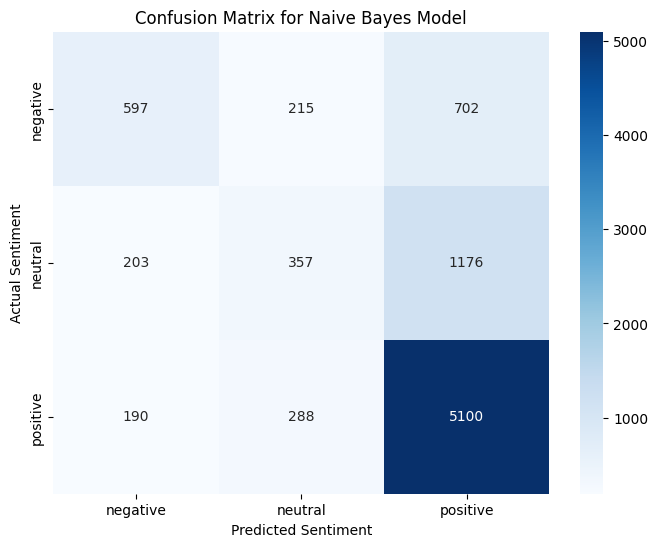

Accuracy: 0.69


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming amazon_data is already prepared with columns: "Comment for company" and "sentiment"
# Encode sentiment labels into numerical categories
sentiment_mapping = {"positive": 2, "neutral": 1, "negative": 0}
amazon_data["sentiment_label"] = amazon_data["sentiment"].map(sentiment_mapping)

# Split the data into training and testing sets
X = amazon_data["Comment for company"]  # Text reviews
y = amazon_data["sentiment_label"]  # Numerical labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vect)

# Classification report
target_names = ["negative", "neutral", "positive"]
classification_report_output = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report:")
print(classification_report_output)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix for Naive Bayes Model")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

# Compute and print accuracy
accuracy = nb_model.score(X_test_vect, y_test)
print(f"Accuracy: {accuracy:.2f}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Classification Report:
              precision    recall  f1-score   support

    negative       0.55      0.34      0.42      5089
     neutral       0.23      0.40      0.29      5700
    positive       0.76      0.66      0.71     18635

    accuracy                           0.55     29424
   macro avg       0.51      0.47      0.47     29424
weighted avg       0.62      0.55      0.58     29424



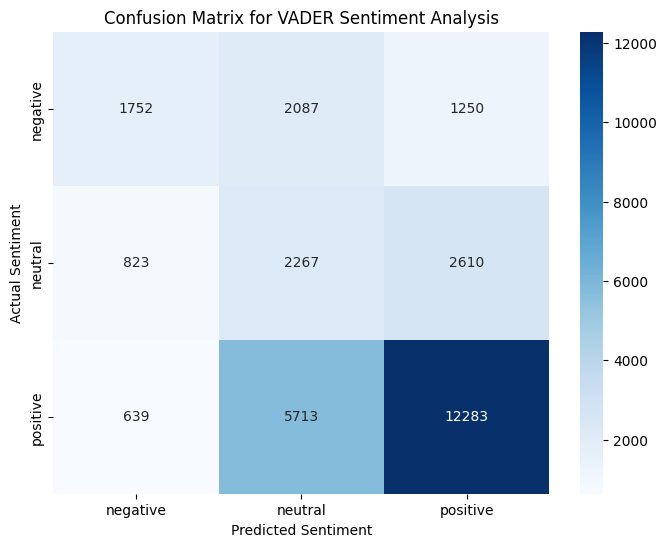

In [47]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Define a function to classify sentiments using VADER
def vader_classify(text):
    sentiment_score = vader.polarity_scores(text)["compound"]  # Get the compound score
    if sentiment_score >= 0.05:  # Positive sentiment threshold
        return "positive"
    elif sentiment_score <= -0.05:  # Negative sentiment threshold
        return "negative"
    else:  # Neutral sentiment range
        return "neutral"

# Apply VADER classification to the "Comment for company" column
amazon_data["vader_sentiment"] = amazon_data["Comment for company"].apply(vader_classify)

# Encode the sentiments as numerical labels for evaluation
sentiment_mapping = {"positive": 2, "neutral": 1, "negative": 0}
amazon_data["actual_sentiment_label"] = amazon_data["sentiment"].map(sentiment_mapping)
amazon_data["predicted_sentiment_label"] = amazon_data["vader_sentiment"].map(sentiment_mapping)

# Evaluate VADER's performance
y_true = amazon_data["actual_sentiment_label"]
y_pred = amazon_data["predicted_sentiment_label"]

# Classification report
target_names = ["negative", "neutral", "positive"]
classification_report_output = classification_report(y_true, y_pred, target_names=target_names)
print("\nClassification Report:")
print(classification_report_output)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix for VADER Sentiment Analysis")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()


In [48]:
import json
import random

# Load the JSONL file
input_file = "amazon_fine_tuning_data.jsonl"

with open(input_file, "r") as f:
    all_data = [json.loads(line) for line in f]

# Shuffle the data to ensure randomness
random.seed(42)  # Set a random seed for reproducibility
random.shuffle(all_data)

# Split the data into the three required sets
api_testing_data_1 = all_data[:430]  # First 430 entries
fine_tuning_training_data = all_data[430:1430]  # Next 1000 entries
fine_tuning_testing_data_2 = all_data[1430:1860]  # Next 430 entries

# Save the subsets to separate JSONL files
def save_to_jsonl(data, output_file):
    with open(output_file, "w") as f:
        for entry in data:
            f.write(json.dumps(entry) + "\n")

save_to_jsonl(api_testing_data_1, "api_testing_data_1.jsonl")
save_to_jsonl(fine_tuning_training_data, "fine_tuning_training_data.jsonl")
save_to_jsonl(fine_tuning_testing_data_2, "fine_tuning_testing_data_2.jsonl")

print("Files created:")
print(" - API Testing Data 1: api_testing_data_1.jsonl")
print(" - Fine-Tuning Training Data: fine_tuning_training_data.jsonl")
print(" - Fine-Tuning Testing Data 2: fine_tuning_testing_data_2.jsonl")


Files created:
 - API Testing Data 1: api_testing_data_1.jsonl
 - Fine-Tuning Training Data: fine_tuning_training_data.jsonl
 - Fine-Tuning Testing Data 2: fine_tuning_testing_data_2.jsonl


In [49]:
import json

# Function to remove the assistant role and content
def remove_assistant_role(input_file, output_file):
    with open(input_file, "r") as infile, open(output_file, "w") as outfile:
        for line in infile:
            entry = json.loads(line)
            # Remove the assistant message
            entry["messages"] = [msg for msg in entry["messages"] if msg["role"] != "assistant"]
            outfile.write(json.dumps(entry) + "\n")

# Remove assistant from API testing data
remove_assistant_role("api_testing_data_1.jsonl", "api_testing_data_1_no_assistant.jsonl")

# Remove assistant from fine-tuning testing data
remove_assistant_role("fine_tuning_testing_data_2.jsonl", "fine_tuning_testing_data_2_no_assistant.jsonl")

print("Assistant roles removed. New files created:")
print(" - API Testing Data without Assistant: api_testing_data_1_no_assistant.jsonl")
print(" - Fine-Tuning Testing Data without Assistant: fine_tuning_testing_data_2_no_assistant.jsonl")


Assistant roles removed. New files created:
 - API Testing Data without Assistant: api_testing_data_1_no_assistant.jsonl
 - Fine-Tuning Testing Data without Assistant: fine_tuning_testing_data_2_no_assistant.jsonl
